In [ ]:
# Instalação das libs

In [ ]:
!pip install tensorflow
!pip install matplotlib

# Conexão com ambiente Gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação das libs


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os


# Configurações CNN

In [ ]:
base_dir = '/content/drive/MyDrive/Atividade_capitulo_1/CNN_Dataset'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

IMG_HEIGHT = 500
IMG_WIDTH = 500
BATCH_SIZE = 25

In [ ]:
print("Carregando dataset de treinamento:")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    label_mode='binary'
)

print("\nCarregando dataset de validação:")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    label_mode='binary'
)

class_names = train_dataset.class_names
print(f"\nClasses encontradas: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Carregando dataset de treinamento:
Found 98 files belonging to 2 classes.

Carregando dataset de validação:
Found 8 files belonging to 2 classes.

Classes encontradas: ['bottle', 'cup']


In [ ]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 500, 500, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 250, 250, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 250, 250, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,073,601 (240.61 MB)

 Trainable params: 63,073,601 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamento modelo CNN

In [ ]:
epochs = 18

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.4703 - loss: 10.7480 - val_accuracy: 0.5000 - val_loss: 1.8867
Epoch 2/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.4651 - loss: 1.4504 - val_accuracy: 0.6250 - val_loss: 0.6815
Epoch 3/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6126 - loss: 0.7304 - val_accuracy: 0.5000 - val_loss: 0.7447
Epoch 4/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6504 - loss: 0.6259 - val_accuracy: 0.5000 - val_loss: 0.9132
Epoch 5/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7015 - loss: 0.6026 - val_accuracy: 0.5000 - val_loss: 1.0333
Epoch 6/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.6465 - loss: 0.5974 - val_accuracy: 0.5000 - val_loss: 1.2100
Epoch 7/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6641 - loss: 0.5142 - val_accuracy: 0.7500 - val_loss: 0.7160
Epoch 8/18
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7703 - loss: 0.3935 - val_accuracy: 0.7500 - val_loss: 

# Teste de Acuracia

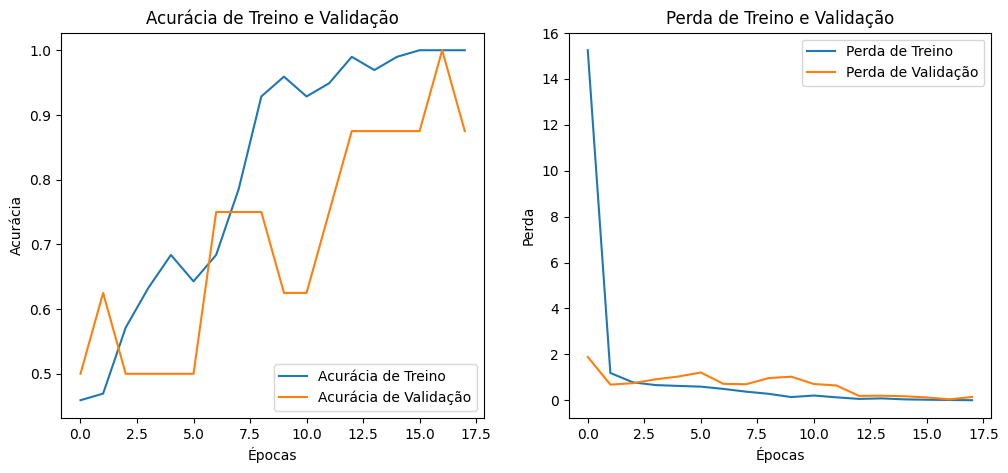

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()

# Teste real

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
A imagem em 'test_cup (1).png' foi classificada como: 'bottle' (Pontuação: 0.0000)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


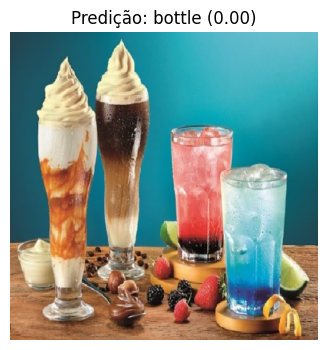

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
A imagem em 'test_bottle (6).png' foi classificada como: 'bottle' (Pontuação: 0.0068)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


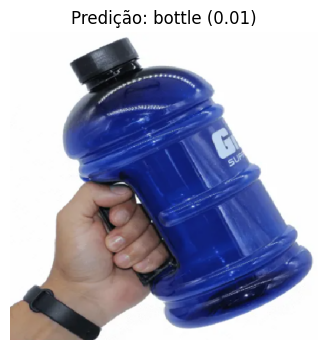

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
A imagem em 'test_bottle (5).png' foi classificada como: 'cup' (Pontuação: 0.7919)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


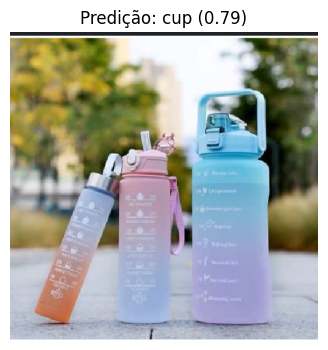

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
A imagem em 'test_cup (4).png' foi classificada como: 'cup' (Pontuação: 0.7432)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


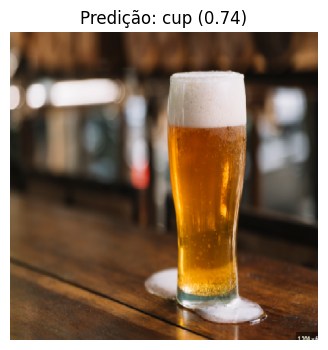

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
A imagem em 'test_bottle (4).png' foi classificada como: 'bottle' (Pontuação: 0.0000)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


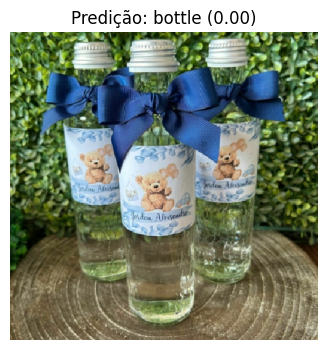

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
A imagem em 'test_bottle (2).png' foi classificada como: 'bottle' (Pontuação: 0.0248)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


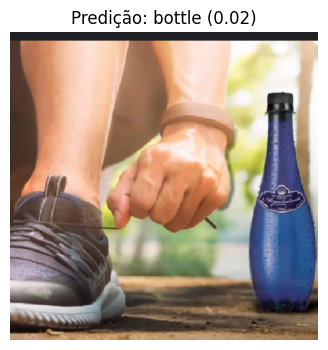

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
A imagem em 'test_cup (3).png' foi classificada como: 'bottle' (Pontuação: 0.0000)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


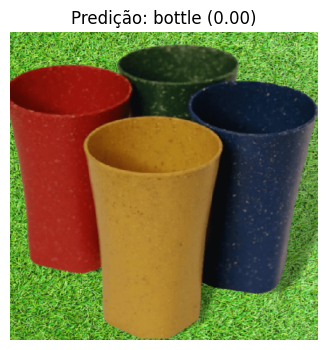

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
A imagem em 'test_bottle (3).png' foi classificada como: 'cup' (Pontuação: 0.6124)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


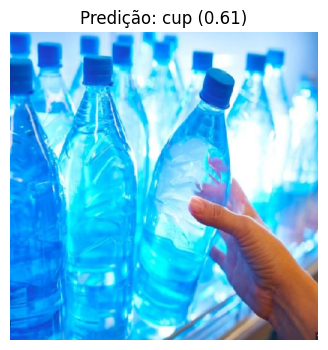

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
A imagem em 'test_cup (2).png' foi classificada como: 'bottle' (Pontuação: 0.0000)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


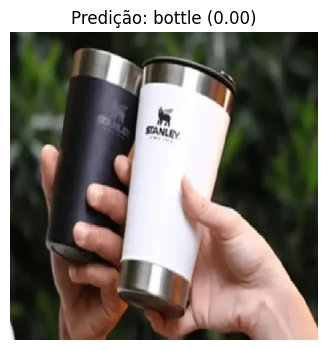

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
A imagem em 'test_bottle (1).png' foi classificada como: 'bottle' (Pontuação: 0.0000)
Lembrete: score < 0.5 = bottle, score >= 0.5 = cup


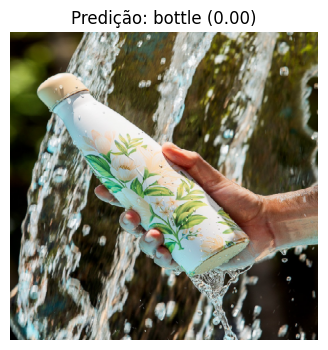

In [ ]:
# Exemplo de caminho: '/content/drive/MyDrive/Atividade_capitulo_1/CNN_Dataset/test/cup/cup_test_01.jpg'
try:
  for image in os.listdir('/content/drive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test'):
    test_image_path = f'/content/drive/MyDrive/Atividade_capitulo_1/Yolo_Dataset/images/test/{image}' # <-- MUDE AQUI

    img = tf.keras.utils.load_img(
        test_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_batch)
    score = prediction[0][0]

    predicted_class_index = int(round(score))
    predicted_class_name = class_names[predicted_class_index]

    print(
        f"A imagem em '{os.path.basename(test_image_path)}' foi classificada como: '{predicted_class_name}' "
        f"(Pontuação: {score:.4f})"
    )
    print("Lembrete: score < 0.5 = {}, score >= 0.5 = {}".format(class_names[0], class_names[1]))

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Predição: {predicted_class_name} ({score:.2f})")
    plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"ERRO: A imagem não foi encontrada no caminho especificado.")
    print(f"Verifique se o caminho '{test_image_path}' está correto.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")


# Conclusões

O modelo com CNN é bastente flexivel quando se trata de alteração de parametros em busca de um resultado melhor, entretanto, é um modelo bastante complexo de se configurar.
Dentre os modelos, foi o segundo que melhor performou para fazer a predição e treinamento, entretanto, um dos que entregou o pior resultado.
Em meus testes, o modelo apresentava uma confusão para reconhecer alguns objetos como copos, mas geralmente acertava a maior parte dos objetos que eram garrafas.
Tentei realizar diversas alterações, entre elas, aumentar a complexidade do modelo, alterar a resolução das imagens trabalhadas, regularizar o **dropout**, alterar a quantidade de epochs e modificar o BATCH_SIZE, mas o modelo insistia em apresentar alguma confusão.
Aparentemennte é o melhor modelo quando o assunto é configuração, mas é o mais complexo de se mexer, o que pode não ser uma opção valida para a FarmTech Solutions.

In [14]:
# Célula de Código 8: Salvar o Modelo em Disco
# ---------------------------------------------
# Após o treinamento, podemos salvar o modelo inteiro em um diretório.
# Isso nos permitirá carregá-lo posteriormente para fazer previsões sem
# precisar treinar tudo de novo.

# O nome 'meu_modelo_cnn' será o nome da pasta onde o modelo será salvo.
model_save_path = '/content/drive/MyDrive/Modelo_CNN.keras'
model.save(model_save_path)

print(f"Modelo salvo com sucesso no diretório: '{model_save_path}'")

Modelo salvo com sucesso no diretório: '/content/drive/MyDrive/Modelo_CNN.keras'
